<a href="https://colab.research.google.com/github/Pdias81/DTScience/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [25]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv")

## Análise dos Dados


Para um melhor entendimento e identificação dos dados em análise, disponibilizamos um dicionário de variáveis, descrito por nome de colunas.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude`- coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de reviews nos últimos 12 meses
* `license`- nº da licença do alojamento

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [22]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,45,3,47,2022-10-07,0.47,1.0,250.0,15.0,NaN
1,25659,Heart of Alfama - Le cœur d'Alfama - Sleeps 3,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,60,2,175,2022-12-11,1.66,1.0,310.0,48.0,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,353,2022-09-05,2.42,1.0,208.0,17.0,23535/AL
3,133645,A pleasure in Lisbon,656138,Juan,Lisboa,Santa Maria Maior,38.71091,-9.13251,Entire home/apt,69,2,348,2022-11-14,2.52,2.0,161.0,62.0,AL/6125
4,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,66,2,352,2022-12-04,2.73,1.0,223.0,51.0,28737/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [31]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("colunas:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.dtypes

Entradas:	 19690
colunas:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [32]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.099492
last_review                       0.099492
license                           0.062925
name                              0.000356
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Da análise dos valores ausentes constantes nas variáveis acima indicadas, conseguimos inferir que a coluna das `reviews_per_month`,`last_review` e `license` possuem menos de 0,1% de valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

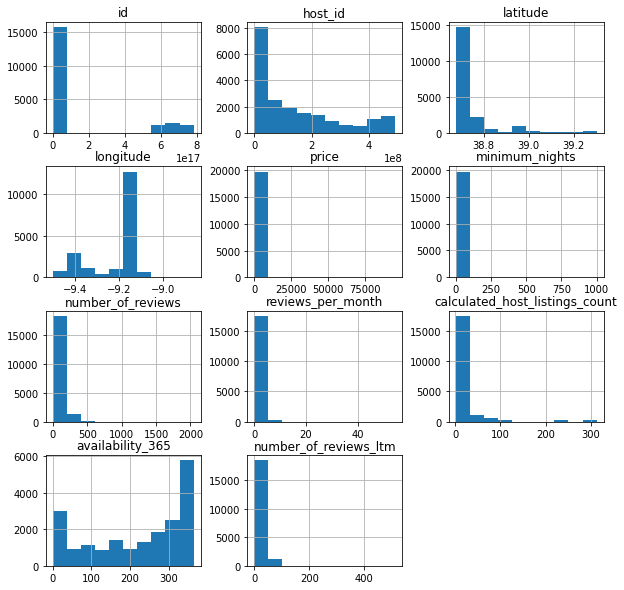

In [33]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(10,10));

### **Q4. Qual a média dos preços de aluguel?**

Podemos verificar que a média dos preços de aluguer é de aproximadamente 140€

In [34]:
# ver a média da coluna `price``
df.price.mean()

140.62407313357033

### **Q4. Qual a correlação existente entre as variáveis**

In [39]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


NameError: ignored

In [ ]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [40]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts() 

Entire home/apt    15118
Private room        4117
Hotel room           239
Shared room          216
Name: room_type, dtype: int64

In [41]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.767801
Private room       0.209091
Hotel room         0.012138
Shared room        0.010970
Name: room_type, dtype: float64

Pela análise dos elementos referentes ao tipo de imóvel mais alugado através do Airbnb na cidade de Lisboa, verificamos que são os apartamentos/casas inteiros, sendo também o tipo de propriedade mais disponível nesta cidade, seguido dos quartos privados.

### **Q6. Qual a localidade mais cara do dataset?**



In [21]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

NameError: ignored

In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [42]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.9616556627729813

## Conclusões
